In [49]:
%matplotlib inline
import numpy as np, numpy.random
import matplotlib.pyplot as plt
import cvxopt as opt
from cvxopt import blas, solvers

n_portfolio = 100
n_asset = 3

# generate random matrix
rand_matrix = np.random.random((n_portfolio, n_asset))
# print rand_matrix

In [50]:
# create 100 portfolios
portfolio = np.zeros((n_portfolio, n_asset))
i = 0
for row in rand_matrix:
    row_sum = np.sum(row)
    j = 0
    for col in row:
        portfolio[i][j] = col/row_sum
        j += 1
    i += 1
# print portfolio

In [51]:
assets = [0.1, 0.2, 0.15]
# find expected return of each portfolio
E = np.dot(portfolio, assets)
# print E

In [52]:
# covariance
C = np.array([[0.005, -0.01, 0.004], [-0.01, 0.04, -0.002], [0.004, -0.002, 0.023]])
# print C

In [53]:
# find variance of all portfolio
variance = np.zeros((n_portfolio, 1))
i = 0
for row in portfolio:
    variance[i] = np.dot(np.dot(row, C), row.T)
    i += 1
# print variance

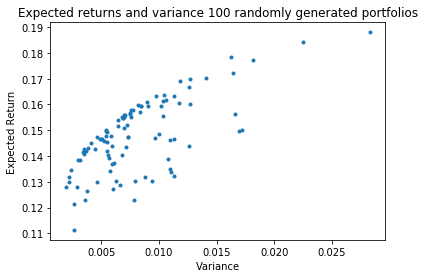

In [55]:
plt.plot(variance, E, 'o', markersize=3)
plt.xlabel('Variance')
plt.ylabel('Expected Return')
plt.title('Expected returns and variance 100 randomly generated portfolios')
plt.show()

     pcost       dcost       gap    pres   dres
 0: -1.5500e-01 -1.2000e+00  1e+00  6e-17  2e+00
 1: -1.5796e-01 -2.1000e-01  5e-02  1e-16  1e-01
 2: -1.9857e-01 -2.1066e-01  1e-02  6e-16  1e-02
 3: -1.9997e-01 -2.0011e-01  1e-04  1e-16  2e-04
 4: -2.0000e-01 -2.0000e-01  1e-06  3e-16  2e-06
 5: -2.0000e-01 -2.0000e-01  1e-08  1e-16  2e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -1.5100e-01 -1.1918e+00  1e+00  0e+00  2e+00
 1: -1.5326e-01 -2.0079e-01  5e-02  3e-16  1e-01
 2: -1.7612e-01 -1.8635e-01  1e-02  3e-17  1e-17
 3: -1.7942e-01 -1.8013e-01  7e-04  3e-16  2e-17
 4: -1.7997e-01 -1.8000e-01  3e-05  1e-16  3e-17
 5: -1.8000e-01 -1.8000e-01  4e-07  4e-17  3e-17
 6: -1.8000e-01 -1.8000e-01  4e-09  1e-16  3e-17
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -1.4720e-01 -1.1840e+00  1e+00  6e-17  2e+00
 1: -1.4889e-01 -1.9217e-01  4e-02  1e-16  1e-01
 2: -1.6162e-01 -1.6915e-01  8e-03  2e-16  4e-17
 3: -1.6399e-01 -1.6445e

Text(0.5,1,u'Expected returns and variance 100 randomly generated portfolios')

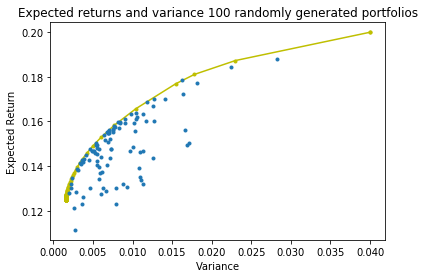

In [66]:
N = 100
points = [t for t in range(N)] # find max return for 100 points
S = opt.matrix(C)
q = opt.matrix(assets, (3, 1)) # mean return of 3 assets

G = -opt.matrix(np.eye(n_asset)) # all 3 portions >= 0
h = opt.matrix(0.0, (n_asset, 1))
A = opt.matrix(1.0, (1, n_asset)) # all 3 portions sum to 1
b = opt.matrix(1.0)
# portfolios = solvers.qp(x*S, -q, G, h, A, b)
portfolios = [solvers.qp(x*S, -q, G, h, A, b)['x'] for x in points]
returns = [blas.dot(q, x) for x in portfolios]
risks = [blas.dot(x, S*x) for x in portfolios]

plt.plot(risks, returns, 'y-o', markersize=3)
plt.plot(variance, E, 'o', markersize=3)
plt.xlabel('Variance')
plt.ylabel('Expected Return')
plt.title('Expected returns and variance 100 randomly generated portfolios')
# plt.show()